# Анализ данных "Метанпромбанка"

# Заказчик и цель работы:

Наш заказчик - это отдел маркетинга "Метанпромбанка". 

Цель работы: "Исследовать причины повышенного оттока клиентов из банка и дать рекомендации по снижению этого показателя для улучшения удержания клиентов". 

Исходные данные: (без обработки) 

• userid — идентификатор пользователя,

• score — баллы кредитного скоринга,

• City — город,

• Gender - пол,

• Age — возраст,

• Equity — количество баллов собственности

• Balance — баланс на счёте,

• Products — количество продуктов, которыми пользуется клиент,

• CreditCard - есть ли кредитная карта,

• Last_activity — активный клиент,

• estimated_salary — заработная плата клиента,

• Churn — ушёл или нет.

Ретроспектива: ранее было проведено исследование, но клиентская база поменялась и поэтому на сегодняшний день старые решения не подойдут




# Задачи проекта по шагам:

# Шаг 1. Загрузите данные и изучите общую информацию

Загружаем данные о банке, изучаем общую информацию о датасете, делаем микро-вывод по каждому столбцу (наличие пропусков, нужно ли менять тип данных)



# Шаг 2. Предобработка данных

1. Изучим, есть ли дубликаты в данных и проверим на наличие пропусков (при наличии пропусков, подумаем, нужно ли их обрабатывать и в случае чего заполним их средним/модой/медианой)

2. Заменим названия столбцов (для удобства в дальнейшей работе)

3. Посмотрим на типы данных и где это нужно, заменим (например float на int)

4. Преобразуем категориальные переменные для корреляции (например пол клиента) в числовой формат с помощью метода кодирования (например one-hot encoding)

5. Посмотрим на выбросы или неточные значения (например клиентом банка по закону нельзя стать в 0-17 лет)

# Шаг 3. Анализ данных

1. Ищем отточные признаки (то есть с помощью подходящего графика показываем: клиенты с каким скорингом, какого пола, какого возраста, с каким кол-вом баллов собственности, с каким балансом на счете, с каким кол-вом продуктов, с наличием кредитной карты, с какой заработной платой наиболее склонны к оттоку) и делаем выводы по каждому перечисленному признаку.

2. Считаем, как в среднем выглядит отточный клиент и не отточный клиент (непрерывные признаки - считаем среднее (ненормальное распределение - медиана), дискретный признак - медиана, категорильный признак - считаем mod

3. Корреляция (корреляция признака оттока с другими признаками (по шкале Чеддока))




# Шаг 4. Проверка гипотез 

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались + ещё одну стат.гипотезу (обосновать, почему выбрали именно эту гипотезу)

# Шаг 5. Промежуточные вывод

Подведем промежуточные выводы по шагу 3 (анализ данных) и шагу 4 (проверке гипотез). Выделим признаки, вляющие на отток


# Шаг 6. Сегментация и приоритизация

1. Делаем срез к основному датафрейму на основе тем данных, которые получили ранее (минимум 3 сегмента по 500 людей)

2. Выделяем более приоритетные и менее приоритетные сегменты для маркетинга

# Шаг 7. Составление рекомендаций

К каждому сегменту - своя рекомендация. Рекомендация должна быть напрямую связана с исследованием.

# Шаг 8. Презентация по проекту.

# ОСНОВНАЯ ЧАСТЬ ПРОЕКТА

## Загрузка и изучение данных


In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import math
import scipy.stats as st
pd.options.display.max_colwidth = 100

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### просмотр первых строк

In [3]:
data.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Смотря на первые строки, можно сразу увидеть большое кол-во пропусков 'NaN' в столбце balance, но это изучим позже.

### просмотр общей информации

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Микро-выводы к каждому столбцу:

USERID - тип данных правильный, пропусков нет, возможны дубликаты (т.к пользователи с одинаковыми id могут быть в разных филиалах банка

score - тип данных стоит перевести в int, пропусков нет

city - тип данных правильный, пропусков нет

gender - тип данных правильный, пропусков нет

age - тип данных в int, есть пропуски (стоит изучить)

equity - тип данных правильный, пропусков нет

balance - тип данных правильный, есть пропуски (стоит изучить)

products - тип данных правильный, пропусков нет

credit_card - тип данных правильный, пропусков нет

last_activity - тип данных правильный, пропусков нет

EST_SALARY - тип данных правильный, пропусков нет

churn - тип данных правильный, пропусков нет




## Предобработка данных

### Замена наименований столбцов

In [5]:
data = data.rename(columns={'USERID': 'id', 'EST_SALARY': 'income'})

### изменение типов данных

In [6]:
data['score'] = data['score'].astype(int)

изменили тип данных в score, в age пока что менять не будем, потому что есть пропущенные значения

### поиск дубликатов

In [7]:

duplicate = data.duplicated(subset=['id']).sum()
duplicate_2 = data[data.duplicated(subset=['id'], keep=False)]
print("Количество строк с повторяющимися user_id:", duplicate)
print("Строки с повторяющимися user_id:")
duplicate_2

Количество строк с повторяющимися user_id: 73
Строки с повторяющимися user_id:


,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,income,churn
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


Есть предположение, что это всё разные пользователи, просто находятся в разных филиалах одного банка. Можно проверить, есть ли пользователи с одинаковым id и городом

In [8]:
duplicate_3 = data[data.duplicated(subset=['id', 'city'], keep=False)]
print("Дубликаты с повторяющимися id и city:")
duplicate_3

Дубликаты с повторяющимися id и city:


,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,income,churn


Таких нет, значит люди с одинаковыми id это не одни и те же пользователи. Можно это доказать, приведя пример:

In [9]:
user_190253 = data.loc[data['id'] == 190253]

user_190253

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,income,churn
231,190253,823,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
1583,190253,726,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0


Разница в возрасте + склонность к оттоку + разные филиалы = разные пользователи

### Поищем некорретных пользователей

#### меньше 18

In [10]:
under_18 = (data['age'] < 18).sum()

print(under_18)

0


Нет пользователей, которым меньше 18

#### 0 продуктов

In [11]:
zero_products = data.query("products == 0")
print(zero_products)

#удалим пользователя с 0 продуктами
data = data.drop(data[data['id'] == 147837].index)

          id  score     city gender   age  equity  balance  products  \
8957  147837    962  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity    income  churn  
8957            0              0  25063.96      1  


In [12]:
#проверка удаления 
#подсчитываем количество пользователей с 0 продуктами еще раз
zero_products_2 = (data['products'] == 0).sum()
print(zero_products_2)

0


найден 1 пользователь с 0 продуктами и мы его удалили, т.к. не пользуется услугами банка

#### пользователи без зарплаты

In [13]:
zero_salary = (data['income'] == 0).sum()

print(zero_salary)

0


таких пользователей нет

### Пропуски 

#### age

In [14]:
missing_age = data['age'].isnull()
missing_age_2 = data[missing_age]
missing_age_2

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,income,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


#### создадим столбец age_nan и ниже на матрице корреляций проанализируем его (сделаем все на одной матрице вместе с balance_nan)

In [15]:
data['age_nan'] = data['age'].isnull().astype(int)

Сделаем вывод по признаку age_nan на матрице корреляции, которую построили ниже, совместно с balance_nan, чтобы не строить одну матрицу несколько раз

### balance

In [16]:
data['city_2'] = data['city']
data['gender_2'] = data['gender']

In [17]:
data = pd.get_dummies(data, columns=['gender_2', 'city_2'])

In [18]:
#проверка
data.head(10)

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,income,churn,age_nan,gender_2_Ж,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1
5,202305,856,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,0,0,1,0,1,0
6,177259,807,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0,1,0,0,0,1
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0,1,0,0,0,1
8,211686,923,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,0,1
9,133130,906,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,0,1,0,0,0,1


#### Корреляция

In [19]:
# Создаем новый признак balance_nan
data['balance_nan'] = data['balance'].isnull().astype(int)


correlation_1 = data.corr()

balance_1 = correlation_1['balance_nan']

print("Корреляция между balance_nan и другими признаками:")
print(balance_1)


Корреляция между balance_nan и другими признаками:
id                  0.004256
score               0.138598
age                -0.029226
equity             -0.710106
balance                  NaN
products           -0.487297
credit_card         0.158645
last_activity       0.028561
income              0.307379
churn              -0.249907
age_nan             0.046870
gender_2_Ж         -0.063621
gender_2_М          0.063621
city_2_Ростов      -0.061444
city_2_Рыбинск     -0.013974
city_2_Ярославль    0.056152
balance_nan         1.000000
Name: balance_nan, dtype: float64


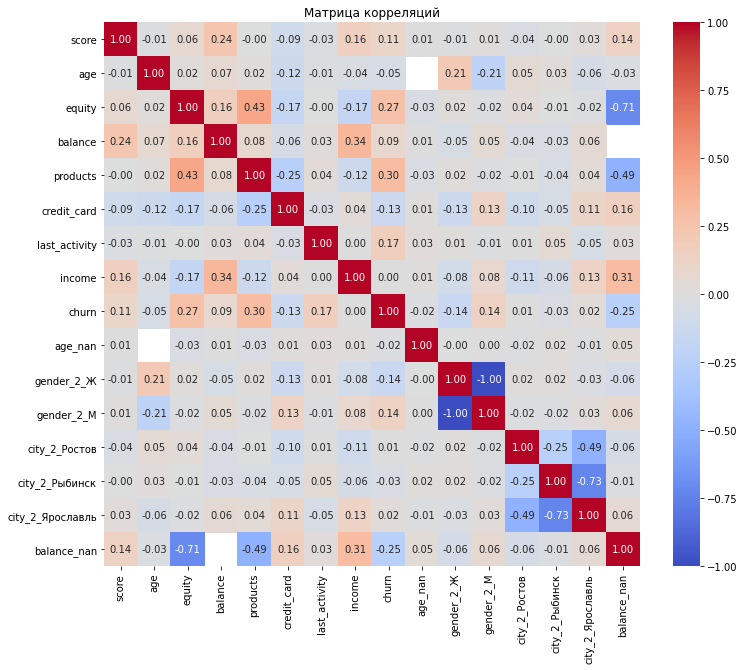

In [20]:
data_without_id = data.drop(columns=['id'])
correlation = data_without_id.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Матрица корреляций')
plt.show()

Касаемо age_nan, мы не увидели даже слабой корреляции между этим признаком и другими, поэтому его можно спокойно заменить медианным значением, тем более пропусков мало. Тип пропуска MCAR

In [21]:
data['age'] = data['age'].fillna(data['age'].median())
data['age'] = data['age'].astype(int)

По шкале корреляций Чеддока: 

Связь между balance_nan и equity обратная высокая, связь между balance_nan и products - обратная умеренная, связь между balance и income - прямая умеренная (смотрим по последней строчке в матрице корреляций

Тип пропуска - MNAR

Если заменим баланс на 0, то мы исказим данные при расчетах, если просто удалим строки, то потеряем много данных, поэтому будет разумным решением оставить в balane NaN.

### сводная таблица

In [22]:

# Средний возраст (age)
mean_age_with_nan = data[data['balance_nan'] == 1]['age'].mean()
mean_age_without_nan = data[data['balance_nan'] == 0]['age'].mean()
relative_difference_age = (mean_age_with_nan - mean_age_without_nan) / mean_age_without_nan

# Средний balance (balance)
mean_balance_with_nan = data[data['balance_nan'] == 1]['balance'].mean()
mean_balance_without_nan = data[data['balance_nan'] == 0]['balance'].mean()
relative_difference_balance = (mean_balance_with_nan - mean_balance_without_nan) / mean_balance_without_nan

# Средняя запрлата (income)
mean_income_with_nan = data[data['balance_nan'] == 1]['income'].mean()
mean_income_without_nan = data[data['balance_nan'] == 0]['income'].mean()
relative_difference_income = (mean_income_with_nan - mean_income_without_nan) / mean_income_without_nan

# Среднее количество кредитных карт (credit_card)
mean_credit_card_with_nan = data[data['balance_nan'] == 1]['credit_card'].mean()
mean_credit_card_without_nan = data[data['balance_nan'] == 0]['credit_card'].mean()
relative_difference_credit_card = (mean_credit_card_with_nan - mean_credit_card_without_nan) / mean_credit_card_without_nan

# Средняя активность (last_activity)
mean_last_activity_with_nan = data[data['balance_nan'] == 1]['last_activity'].mean()
mean_last_activity_without_nan = data[data['balance_nan'] == 0]['last_activity'].mean()
relative_difference_last_activity = (mean_last_activity_with_nan - mean_last_activity_without_nan) / mean_last_activity_without_nan

# Медианное количество собственности (equity)
median_equity_with_nan = data[data['balance_nan'] == 1]['equity'].median()
median_equity_without_nan = data[data['balance_nan'] == 0]['equity'].median()
relative_difference_equity = (median_equity_with_nan - median_equity_without_nan) / median_equity_without_nan

# Медианное количество продуктов (products)
median_products_with_nan = data[data['balance_nan'] == 1]['products'].median()
median_products_without_nan = data[data['balance_nan'] == 0]['products'].median()
relative_difference_products = (median_products_with_nan - median_products_without_nan) / median_products_without_nan

# Средний скоринг (score)
mean_score_with_nan = data[data['balance_nan'] == 1]['score'].mean()
mean_score_without_nan = data[data['balance_nan'] == 0]['score'].mean()
relative_difference_score = (mean_score_with_nan - mean_score_without_nan) / mean_score_without_nan

# Мода по городу (city)
mode_city_with_nan = data[data['balance_nan'] == 1]['city'].mode()[0]
mode_city_without_nan = data[data['balance_nan'] == 0]['city'].mode()[0]

# Мода по полу (gender)
mode_gender_with_nan = data[data['balance_nan'] == 1]['gender'].mode()[0]
mode_gender_without_nan = data[data['balance_nan'] == 0]['gender'].mode()[0]

table_data = {
    'Значение пропущено': [mean_age_with_nan, mean_balance_with_nan, mean_income_with_nan, mean_credit_card_with_nan, mean_last_activity_with_nan, median_equity_with_nan, median_products_with_nan, mean_score_with_nan, mode_city_with_nan, mode_gender_with_nan],
    'Значение не пропущено': [mean_age_without_nan, mean_balance_without_nan, mean_income_without_nan, mean_credit_card_without_nan, mean_last_activity_without_nan, median_equity_without_nan, median_products_without_nan, mean_score_without_nan, mode_city_without_nan, mode_gender_without_nan],
    'Относительная разница': [relative_difference_age, relative_difference_balance, relative_difference_income, relative_difference_credit_card, relative_difference_last_activity, relative_difference_equity, relative_difference_products, relative_difference_score, '', '']
}

index = ['Средний возраст (age)', 'Средний balance (balance)', 'Средняя запрлата (income)', 'Среднее количество кредитных карт (credit_card)', 'Средняя активность (last_activity)', 'Медианное количество собственности (equity)', 'Медианное количество продуктов (products)', 'Средний скоринг (score)', 'Мода по городу (city)', 'Мода по полу (gender)']

table = pd.DataFrame(table_data, index=index)

table


,Значение пропущено,Значение не пропущено,Относительная разница
Средний возраст (age),42.062337,42.920571,-0.019996
Средний balance (balance),NaN,827794.30651,NaN
Средняя запрлата (income),226397.935876,124501.872366,0.81843
Среднее количество кредитных карт (credit_card),0.816042,0.640104,0.274859
Средняя активность (last_activity),0.549695,0.515769,0.065777
Медианное количество собственности (equity),0.0,4.0,-1.0
Медианное количество продуктов (products),1.0,2.0,-0.5
Средний скоринг (score),865.309939,843.73926,0.025566
Мода по городу (city),Ярославль,Ярославль,
Мода по полу (gender),М,Ж,


Средний возраст клиентов с пропущенными значениями составляет 42.08 лет, а без пропущенных значений - 42.92 лет.
Относительная разница между средними значениями составляет -1.97%, что говорит о незначительном различии.

Средняя зарплата клиентов с пропущенными значениями составляет 226397.94, а без пропущенных значений - 124501.87.
Относительная разница между средними значениями составляет 81.84%, что указывает на значительное различие.

Среднее количество кредитных карт у клиентов с пропущенными значениями равно 0.82, а у клиентов без пропущенных значений - 0.64.
Относительная разница между средними значениями составляет 27.49%, что показывает наличие различий.

Средняя активность клиентов с пропущенными значениями равна 0.55, а у клиентов без пропущенных значений - 0.52.
Относительная разница между средними значениями составляет 6.58%, что указывает на некоторое различие.

Т.К мы не знаем значение баланса, следовательно значение equity будет равняться нулю.

Медианное количество продуктов у клиентов с пропущенными значениями равно 1, а у клиентов без пропущенных значений - 2.
Относительная разница между медианными значениями составляет -50%, что указывает на значительное различие.

Средний скоринг клиентов с пропущенными значениями равен 865.31, а у клиентов без пропущенных значений - 843.74.
Относительная разница между средними значениями составляет 2.56%, что говорит о некотором различии.

СЛЕДОВАТЕЛЬНО, ДЕЛАЕМ ВЫВОД, ЧТО У ПОЛЬЗОВАТЕЛЕЙ С ПРОПУЩЕННЫМИ ЗНАЧЕНИЯМИ BALANCE, СРЕДНЯЯ ЗАРПЛАТА НА 80% ВЫШЕ, ЧЕМ У ПОЛЬЗОВАТЕЛЕЙ С ЗАПОЛНЕННЫМ ЗНАЧЕНИЕМ. ТИП ПРОПУСКА MNAR, это мы выяснили.









### Проверим данные после предобработки

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9999 non-null   int64  
 1   score             9999 non-null   int64  
 2   city              9999 non-null   object 
 3   gender            9999 non-null   object 
 4   age               9999 non-null   int64  
 5   equity            9999 non-null   int64  
 6   balance           7705 non-null   float64
 7   products          9999 non-null   int64  
 8   credit_card       9999 non-null   int64  
 9   last_activity     9999 non-null   int64  
 10  income            9999 non-null   float64
 11  churn             9999 non-null   int64  
 12  age_nan           9999 non-null   int64  
 13  gender_2_Ж        9999 non-null   uint8  
 14  gender_2_М        9999 non-null   uint8  
 15  city_2_Ростов     9999 non-null   uint8  
 16  city_2_Рыбинск    9999 non-null   uint8  


Хорошо, проведем ее после интервального анализа, а щас удалим

## EDA (Исследовательский анализ данных)

### Центральные тенденции характеристик в разрезе оттока

In [24]:

churn_stats = data.groupby('churn').agg({
     'equity': 'mean',
    'products': 'mean',
    'credit_card': 'mean',
    'last_activity': 'mean',
    'city_2_Ростов': 'mean',
    'city_2_Рыбинск': 'mean',
    'city_2_Ярославль': 'mean',
    'gender_2_Ж': 'mean',
    'gender_2_М': 'mean',
    'score': 'median',
    'age': 'median',
    'balance': 'median',
    'balance_nan': 'mean',
    'income': 'median'

})

churn_stats_diff = churn_stats.diff().iloc[1] / churn_stats.iloc[0] * 100

churn_comparison_table = pd.concat([churn_stats.loc[1], churn_stats.loc[0], churn_stats_diff], axis=1)
churn_comparison_table.columns = ['Отточные клиенты', 'Неотточные клиенты', 'Разница, %']
churn_comparison_table


,Отточные клиенты,Неотточные клиенты,"Разница, %"
equity,3.764156,2.374817,58.503022
products,2.377130,1.757579,35.250232
credit_card,0.551402,0.709169,-22.246728
last_activity,0.702584,0.483741,45.239722
city_2_Ростов,0.146234,0.140709,3.926647
city_2_Рыбинск,0.239692,0.276039,-13.167330
city_2_Ярославль,0.614074,0.583252,5.284481
gender_2_Ж,0.349643,0.532763,-34.371800
gender_2_М,0.650357,0.467237,39.192125
score,866.000000,848.000000,2.122642


Можно сделать вывод, что отточные и неотточные клиенты имеют различия во многих аспектах, таких как финансовые показатели, активность и демографические характеристики, а именно 

Типичные Отточные клиенты:
- Баллы собственности: 3.76
- Продукты: 2.38
- Наличие кредитной карты: 0.55
- Последняя активность: 0.70
- Филиал в Ростове: 0.15
- Филиал в Рыбинске: 0.24
- Филиал в Ярославле: 0.61
- Женский пол: 0.35
- Мужской пол: 0.65
- Скоринг: 866
- Возраст: 39
- Баланс: 782410
- Пропуски в балансе: 0.006597
- Доходы: 125395

Типичные Неотточные клиенты:
- Баллы собственности: 2.37
- Продукты: 1.757579
- Наличие кредитной карты: 0.71
- Последняя активность: 0.48
- Филиал в Ростове: 0.14
- Филиал в Рыбинске: 0.27
- Филиал в Ярославле: 0.58
- Женский пол: 0.53
- Мужской пол: 0.47
- Скоринг: 848
- Возраст: 40
- Баланс: 475382
- Пропуски в балансе: 0.28
- Доходы: 118257


### Визуализация (сравнение признаков ушедших и оставшихся)

#### Категориальные х-ки

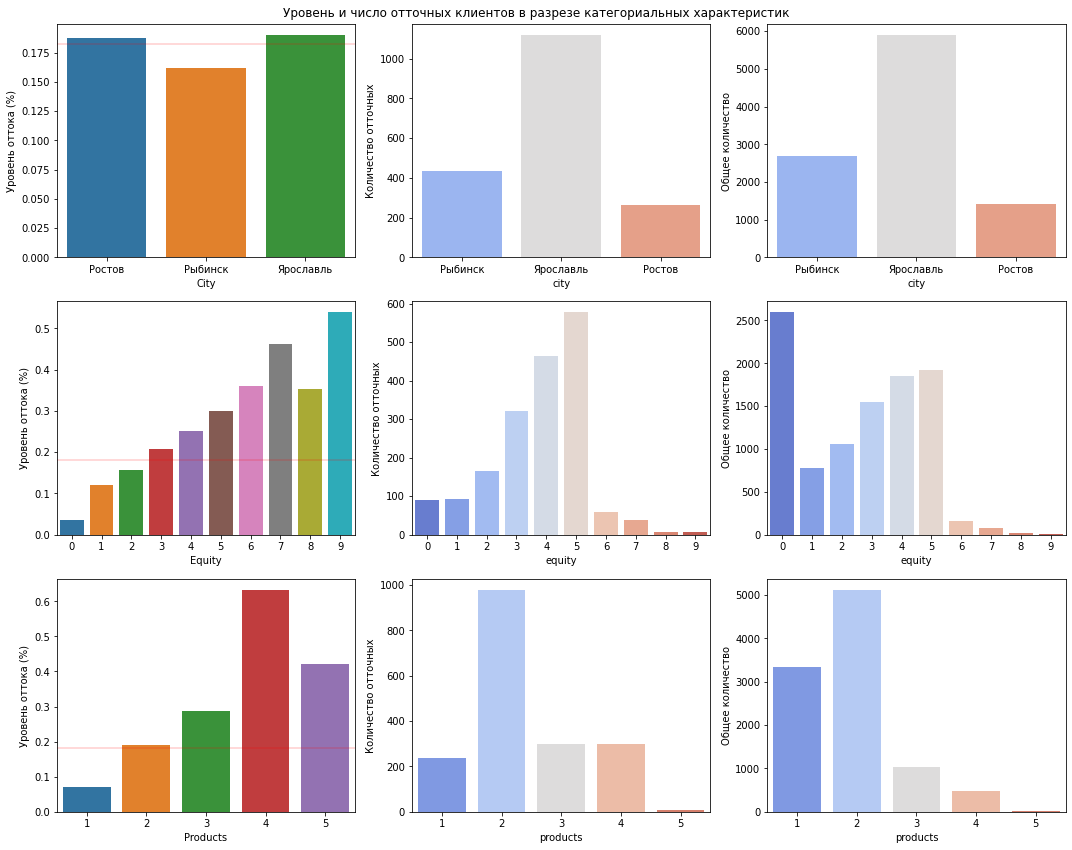

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
categoricals = ['city', 'equity', 'products']

for n, categorical in enumerate(categoricals):
    levels = data.groupby(categorical).agg({'churn': 'mean'}).reset_index()

    for i in range(3):
        if i == 0:
            sns.barplot(data=levels, x=categorical, y='churn', ax=axes[n][i])
            axes[n][i].axhline(y=data['churn'].mean(), color='red', alpha=0.2)
            axes[n][i].set_ylabel("Уровень оттока (%)")
            axes[n][i].set_xlabel(categorical.capitalize())
        elif i == 1:
            sns.countplot(data=data[data['churn'] == 1], x=categorical, palette="coolwarm", ax=axes[n][i])
            axes[n][i].set_ylabel("Количество отточных")
        else:
            sns.countplot(data=data, x=categorical, palette="coolwarm", ax=axes[n][i])
            axes[n][i].set_ylabel("Общее количество")

fig.suptitle("Уровень и число отточных клиентов в разрезе категориальных характеристик")
plt.tight_layout()
plt.show()

Нет города, который особенно выделялся бы процентом оттока клиентов

Баллы собственности у отточных клиентов 3 или больше

Продуктов у отточных 3 или больше


#### Дополнительные исследования 

In [26]:
city_counts = data['city'].value_counts()
total_clients = len(data)
city_percentages = (city_counts / total_clients) * 100
print(city_percentages)




Ярославль    58.885889
Рыбинск      26.942694
Ростов       14.171417
Name: city, dtype: float64


In [27]:
equity_description = data['equity'].describe()
print(equity_description)

count    9999.000000
mean        2.627563
std         1.980931
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64


In [28]:
products_description = data['products'].describe()
print(products_description)

count    9999.000000
mean        1.870287
std         0.792466
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64


#### пол 

In [29]:
gender_counts = data['gender'].value_counts()
total_clients = len(data)
gender_percentages = (gender_counts / total_clients) * 100
print(gender_percentages)

М    50.055006
Ж    49.944994
Name: gender, dtype: float64


In [30]:
churn_counts = data.groupby('gender')['churn'].sum()

print("Количество отточных клиентов по полу:")
churn_counts

Количество отточных клиентов по полу:


gender
Ж     636
М    1183
Name: churn, dtype: int64

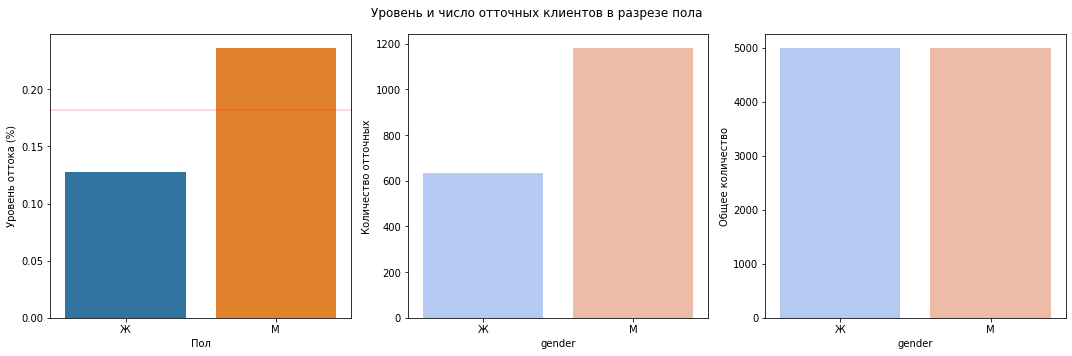

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
gender_levels = data.groupby('gender').agg({'churn': 'mean'}).reset_index()

for i, ax in enumerate(axes):
    if i == 0:
        sns.barplot(data=gender_levels, x='gender', y='churn', ax=ax)
        ax.axhline(y=data['churn'].mean(), color='red', alpha=0.2)
        ax.set_ylabel("Уровень оттока (%)")
        ax.set_xlabel("Пол")
    elif i == 1:
        sns.countplot(data=data[data['churn'] == 1], x='gender', palette="coolwarm", ax=ax)
        ax.set_ylabel("Количество отточных")
    else:
        sns.countplot(data=data, x='gender', palette="coolwarm", ax=ax)
        ax.set_ylabel("Общее количество")

fig.suptitle("Уровень и число отточных клиентов в разрезе пола")
plt.tight_layout()
plt.show()


Доля отточных клиентов женского пола ниже, чем среди клиентов мужского пола, это видно по первому графику, так как отток мужского пола выше среднего оттока по датасету, женский - ниже

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Анализ категориальных/дискретных признаков нужно выполнить по аналогии с группой графиков выше - с помощью анализа относительных значений и `axhline`.

<div class="alert alert-success">
<h2> Комментарий ментора v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### скоринг

In [32]:
score_description = data['score'].describe()
print(score_description)

count    9999.000000
mean      848.688069
std        65.441981
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64


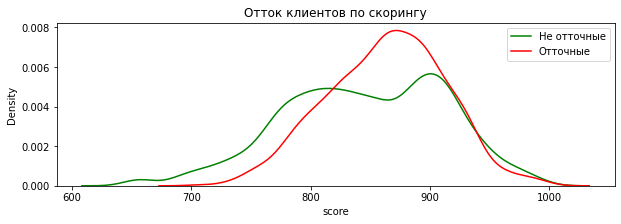

In [33]:
plt.figure(figsize=(10, 3))
sns.kdeplot(data[data['churn'] == 0]['score'], clip=(0.0, 2000000.0), common_norm=False, color='green')
sns.kdeplot(data[data['churn'] == 1]['score'], clip=(0.0, 2000000.0), common_norm=False, color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.title('Отток клиентов по скорингу')
plt.show()


Из банка уходят клиенты, скоринг которых от 820 до 900

#### возраст

In [34]:
age_description = data['age'].describe()
print(age_description)

count    9999.000000
mean       42.723672
std        12.160120
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


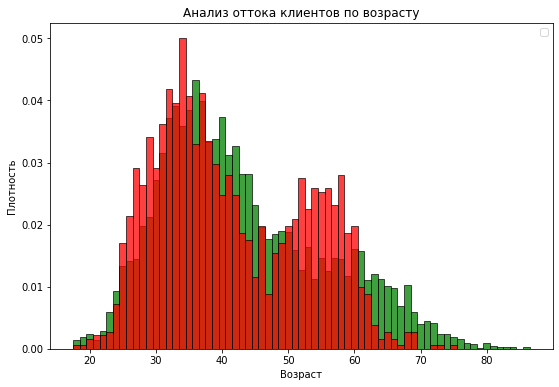

In [35]:
plt.figure(figsize=(9, 6))
plt.title("Анализ оттока клиентов по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend(['Не отточные', 'Отточные'])
sns.histplot(data[data['churn'] == 0]['age'], discrete=True, stat='density', common_norm=False, color='green')
sns.histplot(data[data['churn'] == 1]['age'], discrete=True, stat='density', common_norm=False, color='red')
plt.show()


Возраст оттока от 25 до 35 и от 51 до 60

Судя по графику, можно выделить следующие группы клиентов:

от 18 до 24 лет

от 25 до 35 лет

от 36 до 50 лет

от 51 до 60

61 года и далее



##### категории возраста

In [36]:
#задаем условия
data['age_18_24'] = (data['age'] >= 18) & (data['age'] < 25)
data['age_25_35'] = (data['age'] >= 25) & (data['age'] <= 35)
data['age_36_50'] = (data['age'] >= 36) & (data['age'] <= 50)
data['age_51_60'] = (data['age'] >= 51) & (data['age'] <= 60)
data['age_61_plus'] = (data['age'] >= 61)

#закодируем
data['age_18_24'] = data['age_18_24'].astype(int)
data['age_25_35'] = data['age_25_35'].astype(int)
data['age_36_50'] = data['age_36_50'].astype(int)
data['age_51_60'] = data['age_51_60'].astype(int)
data['age_61_plus'] = data['age_61_plus'].astype(int)

#проверим кодирование
data.head()

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль,balance_nan,age_18_24,age_25_35,age_36_50,age_51_60,age_61_plus
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,0,1,0,0,0,1,0,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,0,1,0,0,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,0,1,0,1,0,1,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,0,1,0,0,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,1,0,0,1,0,0,1,0,0,0


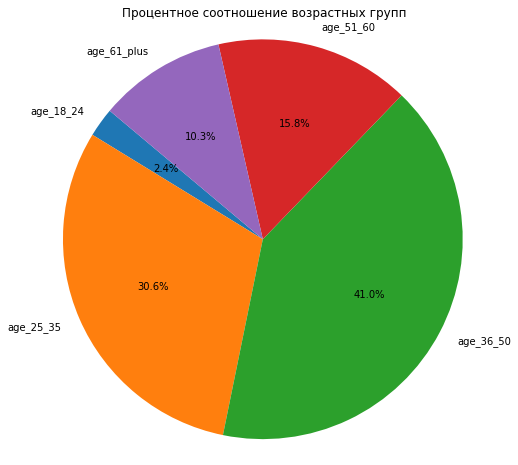

In [37]:
age_count = data[['age_18_24', 'age_25_35', 'age_36_50', 'age_51_60', 'age_61_plus']].sum()

plt.figure(figsize=(8, 8))
plt.pie(age_count, labels=age_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Процентное соотношение возрастных групп')
plt.axis('equal')
plt.show()

Успешно закодировали возраст клиентов и поделили на группы. Самые большие группы клиентов 36-50 и 25-35, самая маленькая 18-24

#### баланс

In [38]:
# посмотрим на выбросы у клиентов
clients_with_high_balance = data[data['balance'] > 20000000]
clients_with_high_balance

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль,balance_nan,age_18_24,age_25_35,age_36_50,age_51_60,age_61_plus
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,...,1,0,0,1,0,0,0,0,1,0
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,...,1,0,0,1,0,0,0,0,1,0
4721,228786,1000,Ярославль,М,45,5,2.900893e+07,2,0,1,...,1,0,0,1,0,0,0,1,0,0
6948,137434,1000,Ярославль,М,37,4,2.090616e+07,2,1,1,...,1,0,0,1,0,0,0,1,0,0
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,...,1,0,0,1,0,0,0,0,0,1
8484,221720,1000,Ярославль,Ж,35,5,2.154994e+07,2,0,0,...,0,0,0,1,0,0,1,0,0,0
9753,122015,885,Ярославль,М,64,4,2.572776e+07,3,1,0,...,1,0,0,1,0,0,0,0,0,1


In [39]:
zero_balance = data[data['balance'] == 0]
zero_balance

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль,balance_nan,age_18_24,age_25_35,age_36_50,age_51_60,age_61_plus
3900,179831,730,Ярославль,М,18,0,0.0,2,1,1,...,1,0,0,1,0,1,0,0,0,0
6757,148456,813,Ярославль,М,20,2,0.0,2,1,0,...,1,0,0,1,0,1,0,0,0,0


In [40]:
data = data[(data['balance'] < 119000000) & (data['balance'] != 0)]

Удалили клиентов с аномально большим или нулевым балансом


In [41]:
balance_description = data['balance'].describe()
print(balance_description)

count    7.702000e+03
mean     8.126515e+05
std      1.451588e+06
min      6.000000e+00
25%      2.956339e+05
50%      5.242838e+05
75%      9.803785e+05
max      6.486621e+07
Name: balance, dtype: float64


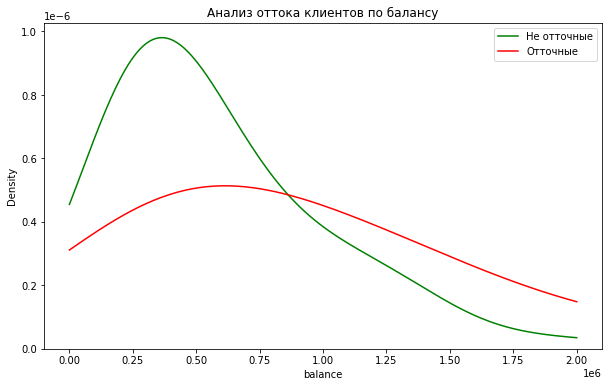

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['churn'] == 0]['balance'], clip=(0.0, 2000000.0), common_norm=False, color='green')
sns.kdeplot(data[data['churn'] == 1]['balance'], clip=(0.0, 2000000.0), common_norm=False, color='red')
plt.title('Анализ оттока клиентов по балансу')
plt.legend(['Не отточные', 'Отточные'])
plt.show()

Баланс оттока от 970к

#### кредитная карта

In [43]:

credit_card_counts = data['credit_card'].value_counts()
total_clients = len(data)
percentage_with_credit_card = (credit_card_counts[1] / total_clients) * 100
percentage_without_credit_card = (credit_card_counts[0] / total_clients) * 100
print("Процент клиентов с кредитной картой:", percentage_with_credit_card)
print("Процент клиентов без кредитной карты:", percentage_without_credit_card)

Процент клиентов с кредитной картой: 63.99636458062841
Процент клиентов без кредитной карты: 36.00363541937159


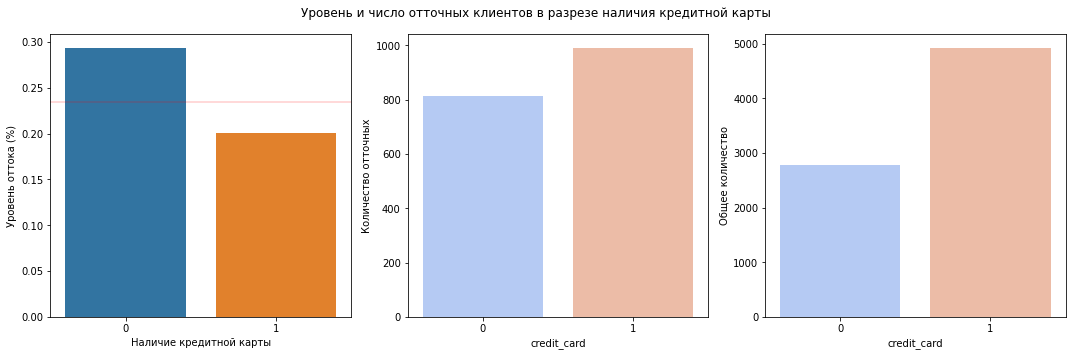

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
credit_card_levels = data.groupby('credit_card').agg({'churn': 'mean'}).reset_index()

for i, ax in enumerate(axes):
    if i == 0:
        sns.barplot(data=credit_card_levels, x='credit_card', y='churn', ax=ax)
        ax.axhline(y=data['churn'].mean(), color='red', alpha=0.2)
        ax.set_ylabel("Уровень оттока (%)")
        ax.set_xlabel("Наличие кредитной карты")
    elif i == 1:
        sns.countplot(data=data[data['churn'] == 1], x='credit_card', palette="coolwarm", ax=ax)
        ax.set_ylabel("Количество отточных")
    else:
        sns.countplot(data=data, x='credit_card', palette="coolwarm", ax=ax)
        ax.set_ylabel("Общее количество")

fig.suptitle("Уровень и число отточных клиентов в разрезе наличия кредитной карты")
plt.tight_layout()
plt.show()


В основном у отточных клиентов нет кредитной карты

#### активность

In [45]:
activity_counts = data['last_activity'].value_counts()
total_users = len(data)
percentage_active_users = (activity_counts[1] / total_users) * 100
percentage_inactive_users = (activity_counts[0] / total_users) * 100
print("Процент активных пользователей:", percentage_active_users)
print("Процент неактивных пользователей:", percentage_inactive_users)

Процент активных пользователей: 51.57102051415217
Процент неактивных пользователей: 48.42897948584783


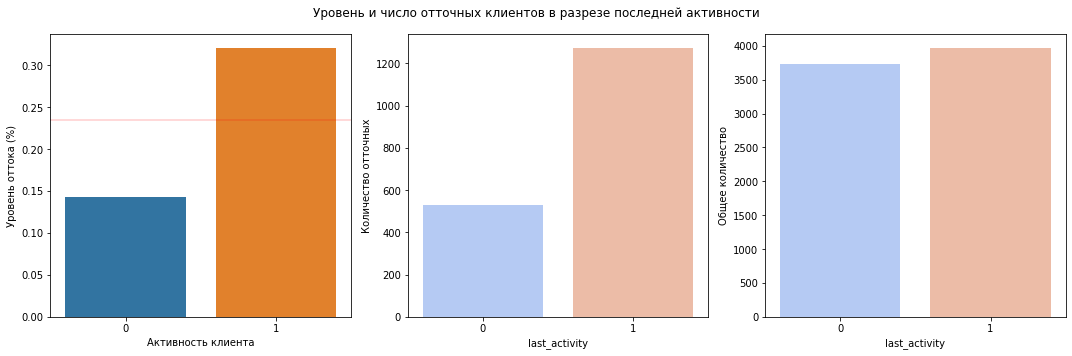

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
last_activity_levels = data.groupby('last_activity').agg({'churn': 'mean'}).reset_index()

for i, ax in enumerate(axes):
    if i == 0:
        sns.barplot(data=last_activity_levels, x='last_activity', y='churn', ax=ax)
        ax.axhline(y=data['churn'].mean(), color='red', alpha=0.2)
        ax.set_ylabel("Уровень оттока (%)")
        ax.set_xlabel("Активность клиента")
    elif i == 1:
        sns.countplot(data=data[data['churn'] == 1], x='last_activity', palette="coolwarm", ax=ax)
        ax.set_ylabel("Количество отточных")
    else:
        sns.countplot(data=data, x='last_activity', palette="coolwarm", ax=ax)
        ax.set_ylabel("Общее количество")

fig.suptitle("Уровень и число отточных клиентов в разрезе последней активности")
plt.tight_layout()
plt.show()

Отточный клиент - активный пользователь

#### доход

In [47]:
income_description = data['income'].describe()
print(income_description)

count    7.702000e+03
mean     1.245210e+05
std      1.046753e+05
min      2.546300e+03
25%      6.756784e+04
50%      1.062237e+05
75%      1.550932e+05
max      1.395064e+06
Name: income, dtype: float64


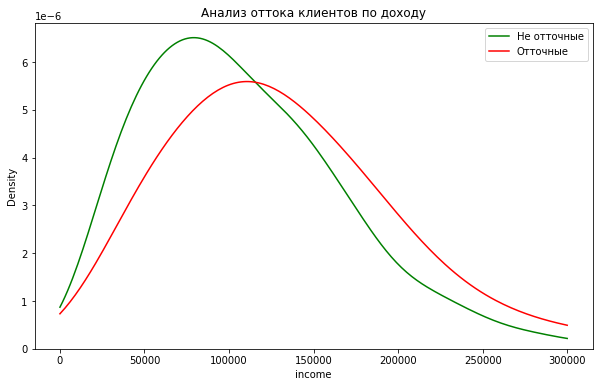

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['churn'] == 0]['income'], clip=(0.0, 300000.0), common_norm=False, color='green')
sns.kdeplot(data[data['churn'] == 1]['income'], clip=(0.0, 300000.0), common_norm=False, color='red')
plt.title('Анализ оттока клиентов по доходу')
plt.legend(['Не отточные', 'Отточные'])
plt.show()

Склонны к оттоку клиенты с доходом от 100к до 225к

### вывод по графикам

К оттоку склонны клиенты (23% от общего числа) со следующими показателями:

score - от 820 до 900

город - пока что нельзя сказать 

пол - мужской

возраст от 25 до 30 и от 51 до 60

баллы собственности - 3 или больше

баланс от 970к

кол-во продуктов 3 или больше

кредитной карты нет

клиент активный

доход от 100к до 225к

### Корреляция churn с другими признаками

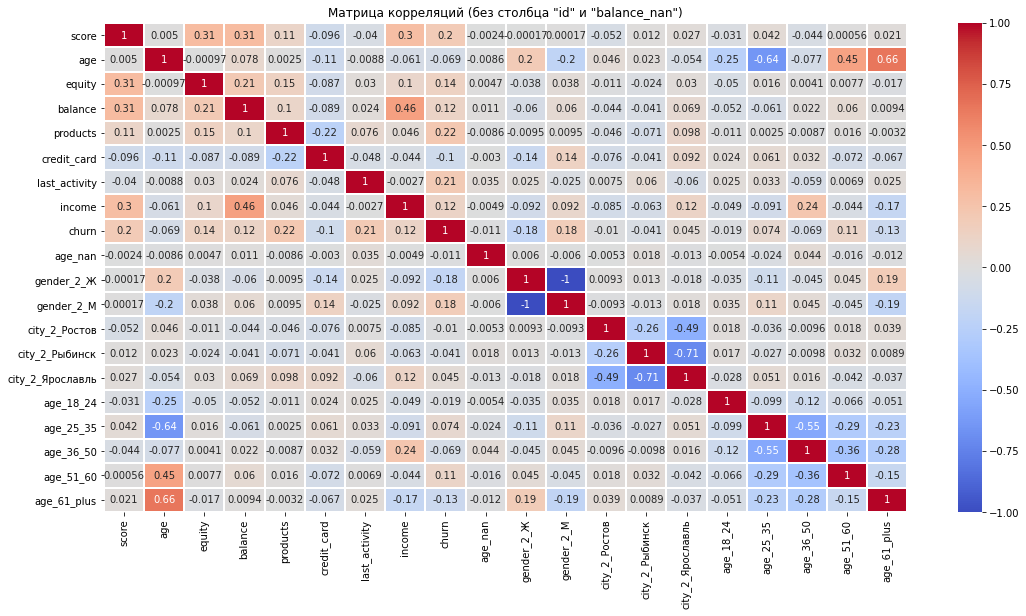

In [49]:
plt.figure(figsize=(18, 9))
data_no_nan = data.drop(columns=['id', 'balance_nan']).dropna()
sns.heatmap(data_no_nan.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1)
plt.title('Матрица корреляций (без столбца "id" и "balance_nan")')
plt.show()

Признаки, которые имеют корреляцию с churn слабую и выше: 

score (слабая), equity (слабая), products (умеренная), credit_card (слабая обратная), last_activity (слабая), мужской и женский пол (слабая и слабая обратная), возраст (в сегментах 51-60 и 61+ слабая и слабая обратная)

#### корреляция по столбцу churn

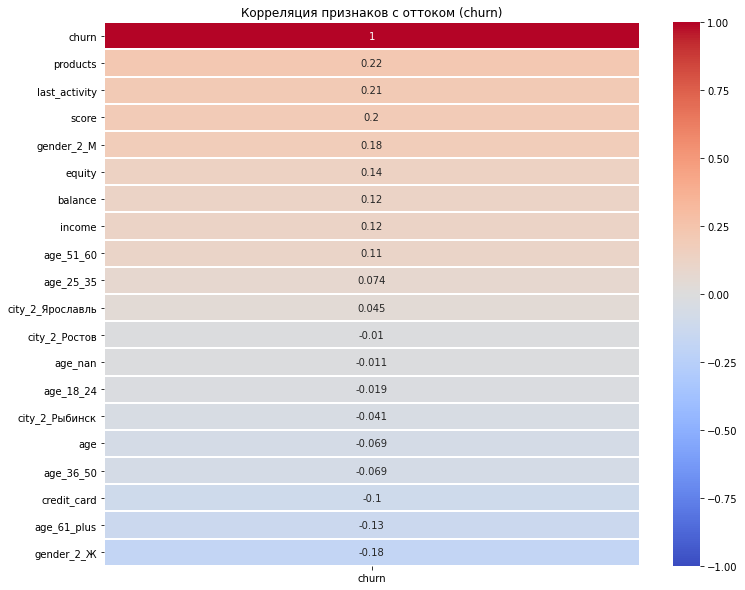

In [50]:
data_2 = data.drop(columns=['id', 'balance_nan'])
churn_corr = data_2.corr()['churn'].sort_values(ascending=False)
plt.figure(figsize=(12, 10))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1)
plt.title('Корреляция признаков с оттоком (churn)')
plt.show()


Отдельная матрица корреляции для churn:

продукты (слабая), последняя активность (слабая), оценка собственности (слабая), скоринг (слабая), мужской пол (слабая), баланс - слабая, доход (слабая), возраст 51-60 (слабая), наличие кредитной карты (обратная слабая), возраст 61+ (обратная слабая), женский пол (обратная слабая).

## Проверка гипотез

#### Посмотрим на распределение

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


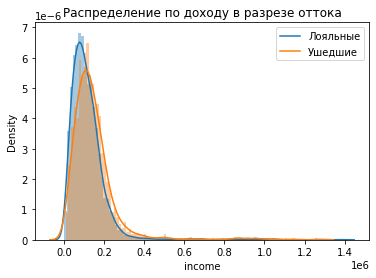

In [51]:

income_churn_0 = data[data['churn'] == 0]['income']
income_churn_1 = data[data['churn'] == 1]['income']

sns.distplot(data[data['churn'] == 0]['income'], bins=100)
sns.distplot(data[data['churn'] == 1]['income'], bins=100)
plt.title('Распределение по доходу в разрезе оттока')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show();

#### посмотрим на выбросы

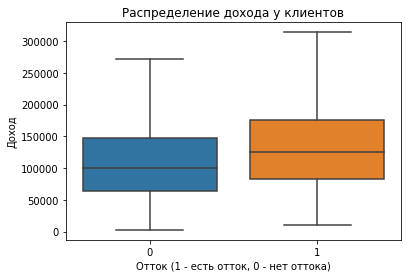

In [52]:
sns.boxplot(y='income', data=data.query('churn in [0,1]'), x='churn', showfliers=False)
plt.title("Распределение дохода у клиентов")
plt.xlabel("Отток (1 - есть отток, 0 - нет оттока)")
plt.ylabel("Доход")
plt.show()

In [53]:
percentiles_churn_0 = data[data['churn'] == 0]['income'].quantile([0.95, 0.98, 0.99])
percentiles_churn_1 = data[data['churn'] == 1]['income'].quantile([0.95, 0.98, 0.99])

print("Перцентили для неотточных:")
print(percentiles_churn_0)
print("\nПерцентили отточных:")
print(percentiles_churn_1)


Перцентили для неотточных:
0.95    237136.9860
0.98    310273.7400
0.99    462084.6508
Name: income, dtype: float64

Перцентили отточных:
0.95    300124.4120
0.98    484000.6744
0.99    854321.6468
Name: income, dtype: float64


#### выбор теста


Центральная предельная теорема (ЦПТ) утверждает, что если мы берем достаточно большую выборку из любого распределения с конечной дисперсией (или если распределение стремится к нормальному), то среднее значение выборки будет приближаться к нормальному распределению, даже если исходное распределение не является нормальным.

Поэтому, если данные имеют пуассоновское распределение, ЦПТ говорит нам, что средние значения выборок из этих данных будут приближаться к нормальному распределению с увеличением размера выборки. Это означает, что даже если исходное распределение не является нормальным, мы все равно можем использовать методы, основанные на нормальном распределении, для анализа средних значений выборок, когда размер выборки достаточно велик.

Выборки достаточно большие и независимы друг от друга. Для анализа гипотез будем использовать t-test Стьюдента.



Нулевая гипотеза: доходы оставшихся и отточных клиентов равны

Альтернативная гипотеза: доходы оставшихся и отточных клиентов не равны



#### проверка гипотезы

In [54]:
results = st.ttest_ind (
    data[data['churn']==0]['income'],
    data[data['churn']==1]['income'], equal_var = False)

alpha = 0.05


print (results.pvalue) 


if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

6.822064596750928e-21
Отвергаем нулевую гипотезу


Вывод по первой гипотезе: t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов нужно отвергнуть и доходы оставшихся и отточных клиентов не равны

### Проверка второй гипотезы

Во второй гипотезе проверим скоринг клиентов, так как нам важно знать, одинаковая ли лояльность у отточных и оставшихся клиентов. Во-первых это позволит банку принимать меры по удержанию клиентов и снижению оттока. Во-вторых, знание скорингов отточных и оставшихся клиентов позволяет банку более эффективно направить маркетинговые усилия.


#### Посмотрим на распределение

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


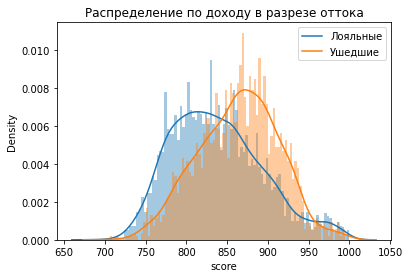

In [55]:

income_churn_2 = data[data['churn'] == 0]['score']
income_churn_3 = data[data['churn'] == 1]['score']

sns.distplot(income_churn_2, bins=100)
sns.distplot(income_churn_3, bins=100)
plt.title('Распределение по доходу в разрезе оттока')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

#### посмотрим на выбросы

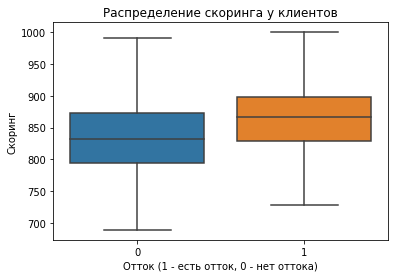

In [56]:
sns.boxplot(y='score', data=data.query('churn in [0,1]'), x='churn', showfliers=False)
plt.title("Распределение скоринга у клиентов")
plt.xlabel("Отток (1 - есть отток, 0 - нет оттока)")
plt.ylabel("Скоринг")
plt.show()

In [57]:
percentiles_churn_01 = data[data['churn'] == 0]['score'].quantile([0.95, 0.98, 0.99])
percentiles_churn_11 = data[data['churn'] == 1]['score'].quantile([0.95, 0.98, 0.99])

print("Перцентили для неотточных:")
print(percentiles_churn_01)
print("\nПерцентили отточных:")
print(percentiles_churn_11)

Перцентили для неотточных:
0.95    942.00
0.98    972.12
0.99    983.00
Name: score, dtype: float64

Перцентили отточных:
0.95    937.00
0.98    959.88
0.99    976.82
Name: score, dtype: float64


#### выбор теста

Распределение нормальное, различие в данных небольшое, можно использовать t-test Cтьюдента

#### проверка гипотезы

Нулевая гипотеза: скоринги отточных и оставшихся клиентов равны
    
Альтернативная гипотеза: скоринги отточных и оставшихся клиентов различаются   

In [58]:
results = st.ttest_ind (
    data[data['churn']==0]['score'],
    data[data['churn']==1]['score'], equal_var = False)

alpha = 0.05


print (results.pvalue) 


if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.1634551255476344e-76
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, уровень кредитного скоринга между отточными и оставшимися в банке клиентами разлчаются

## Промежуточный вывод

Проанализировав гипотезы, мы пришли к выводу, что доходы оставшихся и отточных клиентов равны, а их скоринги отличаются. Скорее всего, на рез-ты гипотез мы не будет рассчитывать при сегментации.
 
Данные которые получили в ходе EDA:

Скоринг - минимальный скоринг клиента 642, максимальный 1000, медиана - 853. 

город - имеем 59% из Ярославля, 27% из Рыбинска и 14% из Ростова.

пол - 50% мужчин, 50% женщин

возраст от 18 до 86 лет, медианный возраст 40 лет

баллы собственности - распределены от 0 до 9, медианный балл - 3

баланс - медианный 524 тысячи

кол-во продуктов от 1 до 5, в среднем 2 продукта

кредитная карта - с ней 68%, без нее 32%

активность: 52% активных, 48% неактивных

доход минимальный 2500, максимальный 1.4 млн, средний 119к - 150к



ПРИЗНАКИ ДЛЯ СЕГМЕНТАЦИИ ОТТОЧНЫХ КЛИЕНТОВ:

Город - точно нельзя сказать

скоринг  - от 820 до 900

пол - мужской

возраст от 25 до 30 и от 51 до 60

баллы собственности - 3 или больше

баланс от 970к

кол-во продуктов 3 или больше

кредитной карты нет

клиент активный

доход от 100к до 225к

Нет, я же отдельно расписал данные, которые получили в ходе EDA и потом ниже написал "ПРИЗНАКИ ДЛЯ СЕГМЕНТАЦИИ ОТТОЧНЫХ КЛИЕНТОВ". Там есть и интервалы и значения. Я так понял, что в выводе мы пишем сначала общие результаты, а потом в пункте 6 думаем над их сегментацией, исходя из нашего общего списка

## Сегментация

Сегментацию аргументирую следующим образом: 

молодой сегмент, у которой нет кредитной карты. 

следующих взяли клиентов, которые достаточно обеспеченны (баланс выше медианного по банку), имеют 3 балла собственности (средний балл по датасету) и средний скоринг. 

Третий сегмент это люди в возрасте, имеющие хороший доход и активный статус

### Сегмент 1: от 25 до 35 лет и отсутствие кредитной карты

In [59]:
# Фильтруем данные по возрасту от 25 до 35 лет и отсутствию кредитной карты
filtered_data = data[(data['age'] >= 25) & (data['age'] <= 35) & (data['credit_card'] == 0)]
total_users_in_segment = len(filtered_data)
churned_users_in_segment = filtered_data['churn'].sum()
churn_percentage_in_segment = (churned_users_in_segment / total_users_in_segment) * 100

print("Количество пользователей в сегменте:", total_users_in_segment)
print("Доля отточных пользователей в сегменте (%):", churn_percentage_in_segment)


Количество пользователей в сегменте: 743
Доля отточных пользователей в сегменте (%): 39.703903095558545


### Сегмент 2. больше 3-х баллов собственности, баланс больше 970к и скоринг выше 820

In [60]:
# Фильтруем данные больше 3-х баллов собственности, баланс больше 970к и скоринг выше 820
filtered_data = data[(data['equity'] >= 3) & (data['balance'] >= 970000) & (data['score'] >= 820) & (data['score'] <= 900)]
total_users_in_segment = len(filtered_data)
churned_users_in_segment = filtered_data['churn'].sum()
churn_percentage_in_segment = (churned_users_in_segment / total_users_in_segment) * 100
print("Количество пользователей в сегменте:", total_users_in_segment)
print("Доля отточных пользователей в сегменте (%):", churn_percentage_in_segment)


Количество пользователей в сегменте: 780
Доля отточных пользователей в сегменте (%): 43.07692307692308


### Сегмент 3. Доход от 100к до 225к, активный статус и возраст от 45 до 60

In [61]:
#Фильтруем данные с доходом от 100 до 225к, активным статусом и возрастом от 45 до 60
filtered_data = data[(data['income'] >= 100000) & (data['income'] <= 225000) & 
                     (data['last_activity'] == 1) & (data['age'] >= 45) & (data['age'] <= 60)]
total_users_in_segment = len(filtered_data)
churned_users_in_segment = filtered_data['churn'].sum()
churn_percentage_in_segment = (churned_users_in_segment / total_users_in_segment) * 100
print("Количество пользователей в сегменте:", total_users_in_segment)
print("Доля отточных пользователей в сегменте (%):", churn_percentage_in_segment)


Количество пользователей в сегменте: 506
Доля отточных пользователей в сегменте (%): 40.316205533596836


### Приоритизация гипотез

Сегмент 1: от 25 до 35 лет и отсутствие кредитной карты
Потенциальные причины оттока: Молодые клиенты могут быть более склонны к оттоку из-за изменения жизненной ситуации, такой как смена работы, места жительства или жизненных целей. Отсутствие кредитной карты может быть индикатором недовольства услугами банка или нежеланием использовать его услуги вообще.

Сегмент 2: больше 3-х баллов собственности, баланс больше 970к и скоринг выше 820
Потенциальные причины оттока: Несмотря на высокие показатели баланса и скоринга, клиенты этого сегмента могут покинуть банк из-за неудовлетворительного обслуживания, низкой доходности инвестиций или поиска более выгодных условий кредитования.

Сегмент 3: Доход от 100к до 225к, активный статус и возраст от 45 до 60
Потенциальные причины оттока: Этот сегмент может покинуть банк из-за неудовлетворенности услугами, увеличения конкуренции на рынке или изменения жизненных обстоятельств

На основе этого анализа, сегмент 1, скорее всего, будет иметь наивысшую приоритетность для банка в плане предотвращения оттока клиентов, так как он может представлять собой группу с более высокой нестабильностью и более высокой вероятностью оттока. Сегменты 2 и 3 также будут важны, но их приоритет может быть ниже, поскольку они, вероятно, более финансово стабильны.

## рекомендации к каждому сегменту

Рекомендация для сегмента от 25 до 35 лет и без кредитной карты: для молодого сегмента стоит ввести улучшенные предложения по кредитной карте, например сделать персональные предложения с более низкими процентными ставками, чем у более старшего по возрасту сегмента. А чтобы сделать оформление кредитной карты более выгодным для молодежи, можно предложить молодым клиентам специальные условия при оформлении первой кредитной карты, например отсутствие ежемесячной платы за обслуживание или бонусные начисления за использование карты.

Рекомендация для сегмента, у которых более 3-х баллов собственности, баланс больше 970к и скоринг выше 820: этот сегмент скорее всего склонен уходить из-за того, что не нашли для себя подходящего предложения или недовольны обслуживанием. Так как это достаточно обеспеченные клиенты, то можно предложить эксклюзивные услуги, такие как VIP-обслуживание, приоритетное обслуживание в отделениях банка и гибкие условия погашения кредита. Если клиент поймет, что банк выгоден для него в плане безопасности финансов и лучшими предложениями среди конкурентов, то он будет лоялен.

Рекомендации для сегмента у которых доход от 100к до 225к, активный статус и возраст от 45 до 60: так как это клиенты, которые уже обладают своей недвижимостью, то можно предложить специальные условия по страхованию объектов собственности. А если человек в этом возрасте вышел уже на пенсию, то предложить льготные условия для перевода пенсии в банк. 

ОБЩИЕ РЕКОМЕНДАЦИИ: 

Уделить особое внимание молодому сегменту, так как часто уходят люди от 25 до 30 лет. 

Для людей с высокими баллами собственности предложить особое страхование

Активным клиентам делать повышенные кэшбэки.


## презентация

https://disk.yandex.ru/i/Z3-ZYPYCvpZNmg